# Lab session 3 ---- Linear Classification

Student: Mohammed Abdul Majeed Hussain                       
Date:19/05/2019

## I. Introduction
In this lab, we will implement linear discriminant analysis and logistic regression.
We will try to recognize images.
You shall submit a clearly written and commented report as well as your own code.

## II. Female or Male?
The file heightWeightData.txt contains some data showing the height and weight of different people. The first column is the class label (1=male, 2=female), the second column is the height and the third is the weight.

## Question 1
Extract the height/weight data corresponding to males. 

In [428]:
#To ignore warnings 
import warnings
warnings.filterwarnings('ignore')

In [429]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import scipy.io
from numpy.matlib import repmat
from sklearn.decomposition import PCA
from scipy.stats import chi2
from matplotlib.patches import Ellipse
#from numpy.linalg import cholesky
%matplotlib inline

In [431]:
df = pd.read_csv('heightWeightData.txt', delimiter=',',names =['Label','Height','Weight'])
df.head()

,Label,Height,Weight
0,1,67,125
1,2,68,140
2,2,67,142
3,2,60,110
4,2,64,97


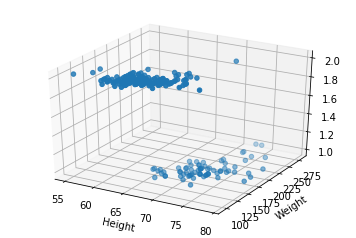

In [432]:
#  Let's plot first in 3d Just to visualize how our Scores are correlated

from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')
plt.xlabel('Height')
plt.ylabel('Weight')
ax.scatter(df.Height,df.Weight,df.Label)

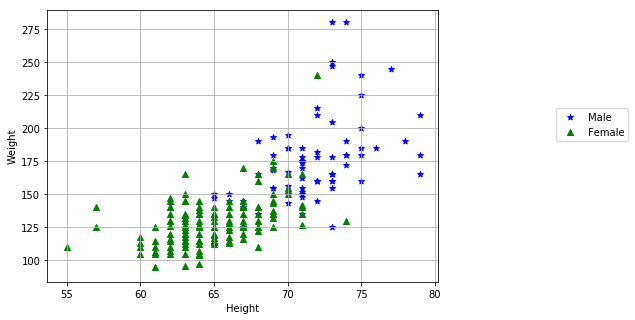

In [433]:
#Now let's plot on 2D 
def Plotdata():
    plt.figure(figsize=(7,5))
    male = df.loc[df['Label'] == 1]
    female = df.loc[df['Label'] == 2]
    plt.scatter(male['Height'],male['Weight'],c="b",marker="*")
    plt.scatter(female['Height'],female['Weight'],c="g",marker="^") 
    plt.xlabel("Height")
    plt.ylabel("Weight")
    plt.legend(["Male","Female"],loc=4,bbox_to_anchor=(1.5, 0.5))
    plt.grid(True)
    
Plotdata()

In [437]:

# source: http://www.nhsilbert.net/source/2014/06/bivariate-normal-ellipse-plotting-in-python/

def plot_cov_ellipse(cov, pos, volume=.5, ax=None, fc='none', ec=[0,0,0], a=1, lw=2):
    """
    Plots an ellipse enclosing *volume* based on the specified covariance
    matrix (*cov*) and location (*pos*). Additional keyword arguments are passed on to the 
    ellipse patch artist.

    Parameters
    ----------
        cov : The 2x2 covariance matrix to base the ellipse on
        pos : The location of the center of the ellipse. Expects a 2-element
            sequence of [x0, y0].
        volume : The volume inside the ellipse; defaults to 0.5
        ax : The axis that the ellipse will be plotted on. Defaults to the 
            current axis.
    """

    def eigsorted(cov):
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        return vals[order], vecs[:,order]

    if ax is None:
        ax = plt.gca()

    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))

    kwrg = {'facecolor':fc, 'edgecolor':ec, 'alpha':a, 'linewidth':lw}

    # Width and height are "full" widths, not radius
    width, height = 2 * np.sqrt(chi2.ppf(volume,2)) * np.sqrt(vals)
    ellip = Ellipse(xy=pos, width=width, height=height, angle=theta, **kwrg)

    ax.add_artist(ellip) 

In [438]:
#gaussian
#gaussian = np.random.multivariate_normal(mu_male, covariance_male)

#Superimpose gaussian on our data
#Plotdata()
#ellipse = plot_cov_ellipse(cov_male, mean_male)
#plt.title('Superimpose of Gaussian on data')


In [439]:
male = df.loc[df['Label'] == 1].as_matrix()
new_X = male[:, [1, 2]]


In [440]:
# mean 
mu_male = np.mean(new_X, 0)

# covariance 
X_muCenter = new_X - repmat(mu_male, np.size(new_X, 0), 1)
covariance_male = np.cov(new_X.T)


Text(0.5,1,'Superimpose of Gaussian on male data')

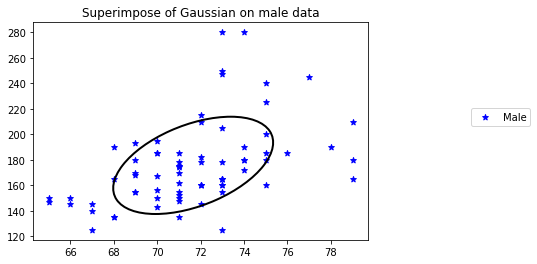

In [441]:
#gaussian
gaussian = np.random.multivariate_normal(mu_male, covariance_male)
data = plt.scatter(new_X[:,0], new_X[:,1], color = 'b', marker = '*')
#Superimpose gaussian on our data
#Plotdata()
ellipse = plot_cov_ellipse(covariance_male, mu_male)
plt.legend(["Male"],loc=4,bbox_to_anchor=(1.5, 0.5))
plt.title('Superimpose of Gaussian on male data')

## Question 2 
Standardize the data (i.e. make each feature have 0 mean and unit variance) and re-estimate the
2d Gaussian.

In [442]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
standard_X = scaler.fit_transform(new_X)


In [443]:
# mean of male heights and weights
mu_male = np.mean(standard_X, 0)

# covariance of male height and weight
X_muCenter = standard_X - repmat(mu_male, np.size(standard_X, 0), 1)
covariance_male = np.cov(standard_X.T)


Text(0.5,1,'Superimpose of Gaussian on standadized male data')

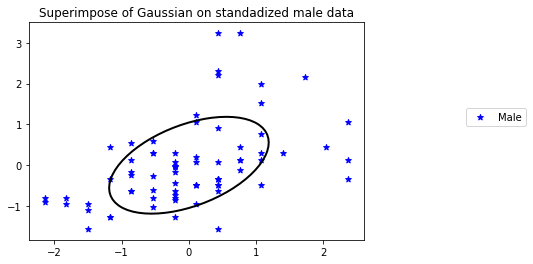

In [444]:
#gaussian
gaussian = np.random.multivariate_normal(mu_male, covariance_male)
data = plt.scatter(standard_X[:,0], standard_X[:,1], color = 'b', marker = '*')
#Superimpose gaussian on our data
#Plotdata()
ellipse = plot_cov_ellipse(covariance_male, mu_male)
plt.legend(["Male"],loc=4,bbox_to_anchor=(1.5, 0.5))
plt.title('Superimpose of Gaussian on standadized male data')

## Question 3
data whitening or sphering

In [445]:
# Data whitening

# estimating dominant eigenvectors of data
cov_male_centered = np.cov(X_meanCenter.T)
evals, evecs = np.linalg.eigh(cov_male_centered)
order = evals.argsort()[::-1]
evals = evals[order]
evecs = evecs[:,order]

# project data along the dominant eigenvectors 
X_whitened = np.dot(np.diag(1./evals), np.dot(evecs.T, X_meanCenter.T))
X_whitened = X_whitened.T

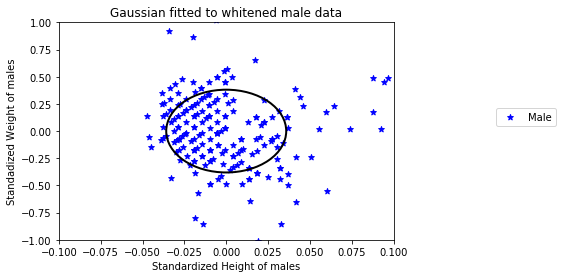

In [446]:
# visualizing male data and gaussians after Standadization
mean_male_whitened = np.mean(X_whitened, 0)
cov_male_whitened = np.cov(X_whitened.T)

plt.scatter(X_whitened[:,0], X_whitened[:,1], color = 'b', marker = '*')
plot_cov_ellipse(cov_male_whitened, mean_male_whitened)

plt.xlabel('Standardized Height of males')
plt.ylabel('Standadized Weight of males')
plt.title('Gaussian fitted to whitened male data')
plt.legend(["Male"],loc=4,bbox_to_anchor=(1.5, 0.5))
plt.xlim([-0.1, 0.1])
plt.ylim([-1, 1])

plt.show()


After Standadization the Gaussian is fits perfectly around data, Standardizing the features around the center and 0 with a standard deviation of 1 is important when we compare measurements that have different units. Variables that are measured at different scales do not contribute equally to the analysis and might end up creating a bais.

## We now want to use the height/weight features to classify each person as male or female.
## Question 1
Use LDA to perform this classification and compute the training error. Note that we will use all data as training set.

In [447]:
#Matrices
X = df.as_matrix(['Height','Weight'])
Y = df.as_matrix(['Label'])
m,n = X.shape

In [448]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 0)

In [449]:
# Applying Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components = 2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [450]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
 
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [451]:
score2 = classifier.score(X_test, y_test)
print("Accuracy obtained: {} Percentage".format(score2*100))

Accuracy obtained: 90.47619047619048 Percentage


In [452]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[ 4  2]
 [ 0 15]]


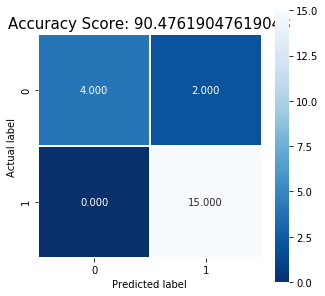

In [453]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score2*100)
plt.title(all_sample_title, size = 15);

## Question 2
We can also use PCA to project the data onto a 1d space. Compute the corresponding principal component and explain the difference with the decision boundary found by LDA?

In [454]:
pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train, y_train)
X_test = pca.transform(X_test)
classifier2 = LogisticRegression(random_state = 0)
classifier2.fit(X_train, y_train)
 
# Predicting the Test set results
y_pred = classifier2.predict(X_test)
score3 = classifier2.score(X_test, y_test)
print("Accuracy obtained: {} Percentage".format(score3*100))

Accuracy obtained: 90.47619047619048 Percentage


## III. Digits recognition

## Question 1
Data visualization

In [455]:
import pandas as pd
import numpy as np
import scipy.io
traindata = scipy.io.loadmat('trainingData.mat')
testdata = scipy.io.loadmat('testData.mat')

In [456]:
X_train = traindata['training']
Y_train = traindata['trainingLabels']
X_test = testdata['test']
Y_test = testdata['testLabels']

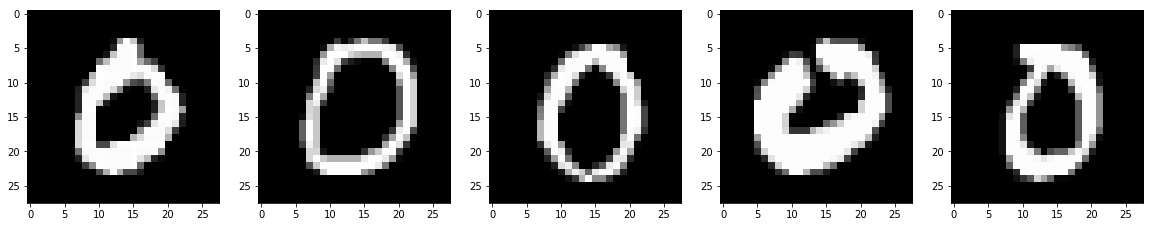

In [457]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(X_train[0:5], X_test[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)

## Question 2
Dimension reduction:

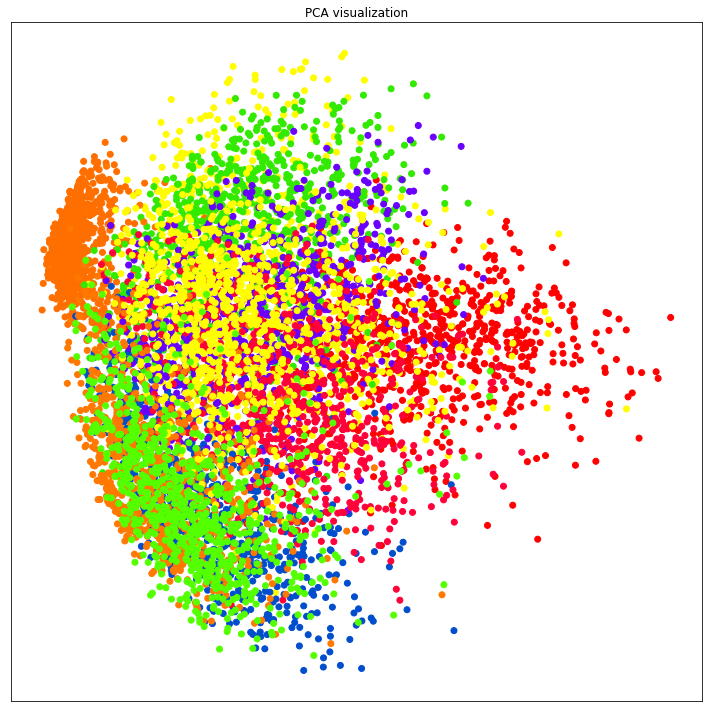

In [458]:

pca = PCA(n_components=2)
fig, plot = plt.subplots()
fig.set_size_inches(10, 10)
plt.prism()

X_transformed = pca.fit_transform(X_train)
plot.scatter(X_transformed[:, 0], X_transformed[:, 1],c = Y_train.reshape(8000))
plot.set_xticks(())
plot.set_yticks(())
plt.title("PCA visualization")
plt.tight_layout()

In [459]:
#We can see how much of the variance is represented by the two components that remain
pca.explained_variance_ratio_.sum()

0.17480438592159508

## Question 3
Classification

In [460]:
from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [461]:
logisticRegr.predict(X_test[0].reshape(1,-1))
logisticRegr.predict(X_test[0:10])

array([0, 0, 0, 7, 4, 2, 0, 0, 0, 0], dtype=uint8)

In [462]:
predictions = logisticRegr.predict(X_test)

In [463]:
score = logisticRegr.score(X_test, Y_test)
print("Accuracy obtained: {} Percentage".format(score*100))

Accuracy obtained: 86.75 Percentage


In [464]:

cm = metrics.confusion_matrix(Y_test, predictions)
#print(cm)

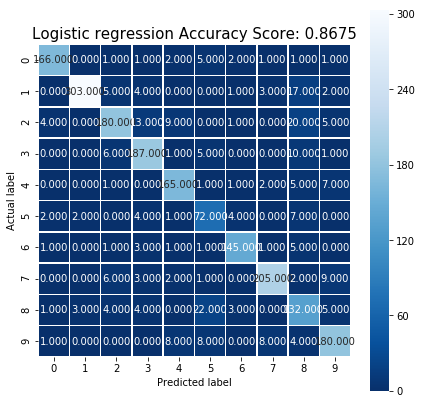

In [465]:
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Logistic regression Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

SVM

In [397]:
from sklearn import svm
clf = svm.LinearSVC()
clf.fit(X_train, Y_train)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [466]:
clf.predict(X_test[0].reshape(1,-1))
clf.predict(X_test[0:10])

array([0, 0, 0, 7, 9, 0, 0, 3, 0, 0], dtype=uint8)

In [467]:
predictions = logisticRegr.predict(X_test)

In [468]:
score = clf.score(X_test, Y_test)
print("Accuracy obtained: {} Percentage".format(score*100))

Accuracy obtained: 87.4 Percentage


In [469]:
cm = metrics.confusion_matrix(Y_test, predictions)

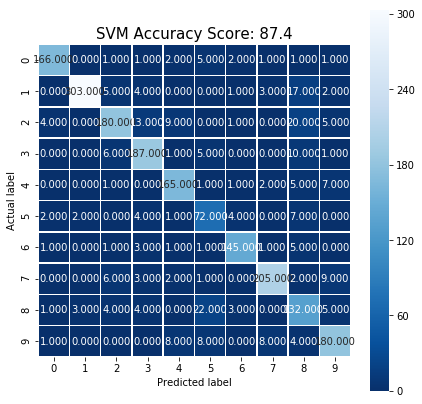

In [470]:
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'SVM Accuracy Score: {0}'.format(score*100)
plt.title(all_sample_title, size = 15);

# Please write your complete report in markdown here.

In [471]:
scaler = MinMaxScaler(feature_range=[0, 1])
data_rescaled = scaler.fit_transform(X_train)

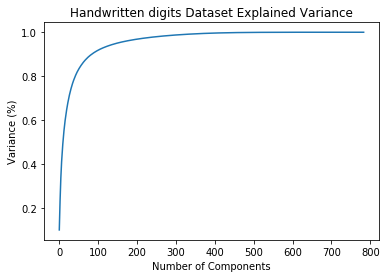

In [472]:
#Fitting the PCA algorithm with our Data
pca = PCA().fit(data_rescaled)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Handwritten digits Dataset Explained Variance')
plt.show()

From the above graph we can see that around with 150 number of components we  can preserve around 95 percent of total variance of data.By using this we can determine how many components should be taken into account.

In [473]:
pca = PCA(n_components=150)
X_transformed = pca.fit_transform(X_train)
pca.explained_variance_ratio_.sum()

0.9503946401868448